<a href="https://colab.research.google.com/github/VishwasAggarwal23/Cureya-Internship/blob/main/Copy_of_WEEK_4(VISHWAS_AGGARWAL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_palette('cool')

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
test_df =pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")

### **Data Preprocessing**

In [37]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [40]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [41]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
test_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [43]:
train_df.PassengerId.nunique()
passengerId = test_df['PassengerId']

In [44]:
train_df.drop(labels='PassengerId', axis=1, inplace=True)
test_df.drop(labels='PassengerId', axis=1, inplace=True)

In [45]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **Visualise some of the attributes of the dataset.**

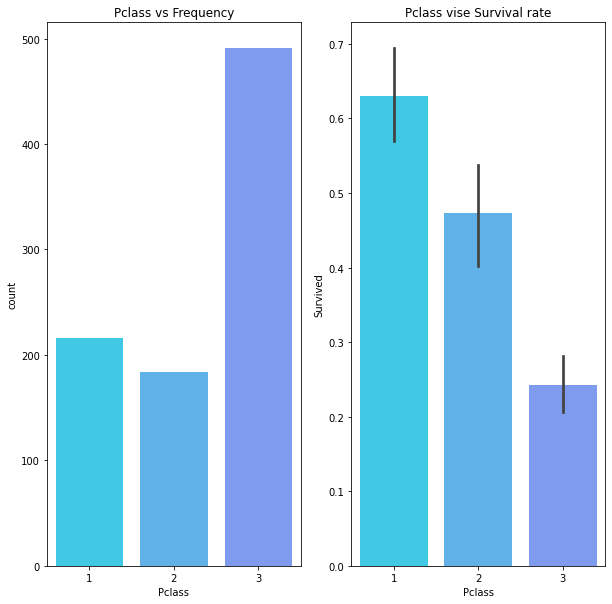

In [46]:
fx, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].set_title("Pclass vs Frequency")
axes[1].set_title("Pclass vise Survival rate")
fig1_pclass = sns.countplot(data=train_df, x='Pclass', ax=axes[0])
fig2_pclass = sns.barplot(data=train_df, x='Pclass',y='Survived', ax=axes[1])

In [47]:
print(train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [48]:
train_df.Name.nunique()

891

### **Observations**

As we can see that population of passengers as per Pclass is ( 3 > 1 > 2). Survival percentage as per classes is ( 1 > 2 > 3). So we can say that the 1st class passengers have higher survival rate.

In [49]:
train_df['Title'] = train_df['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
test_df['Title'] = test_df['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])

train_df['Name_Len'] = train_df['Name'].apply(lambda x: len(x))
test_df['Name_Len'] = test_df['Name'].apply(lambda x: len(x))


train_df.drop(labels='Name', axis=1, inplace=True)
test_df.drop(labels='Name', axis=1, inplace=True)

In [50]:
test_df.Name_Len = (test_df.Name_Len/10).astype(np.int64)+1
train_df.Name_Len = (train_df.Name_Len/10).astype(np.int64)+1

In [51]:
print (train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

        Title  Survived
0       Capt.  0.000000
1        Col.  0.500000
2        Don.  0.000000
3         Dr.  0.428571
4   Jonkheer.  0.000000
5       Lady.  1.000000
6      Major.  0.500000
7     Master.  0.575000
8       Miss.  0.697802
9       Mlle.  1.000000
10       Mme.  1.000000
11        Mr.  0.156673
12       Mrs.  0.792000
13        Ms.  1.000000
14       Rev.  0.000000
15       Sir.  1.000000
16        the  1.000000


In [52]:
print (train_df[['Name_Len', 'Survived']].groupby(['Name_Len'], as_index=False).mean())

   Name_Len  Survived
0         2  0.220588
1         3  0.331776
2         4  0.493827
3         5  0.750000
4         6  0.800000
5         7  1.000000
6         9  1.000000


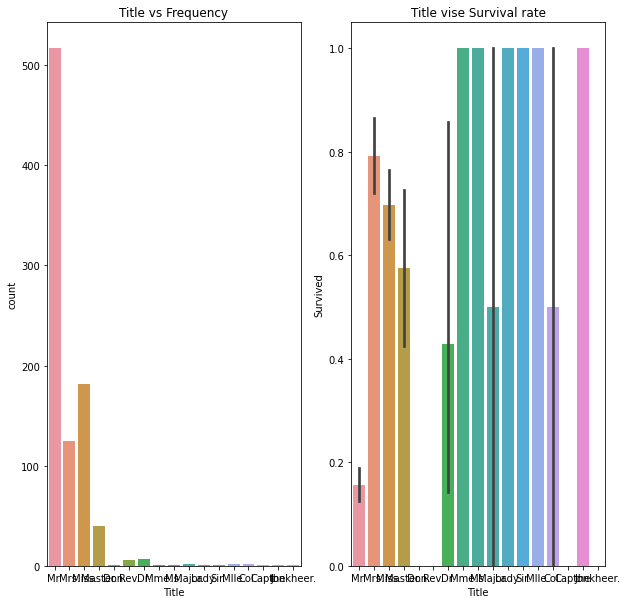

In [53]:
fx, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].set_title("Title vs Frequency")
axes[1].set_title("Title vise Survival rate")
fig1_title = sns.countplot(data=train_df, x='Title', ax=axes[0])
fig2_title = sns.barplot(data=train_df, x='Title',y='Survived', ax=axes[1])

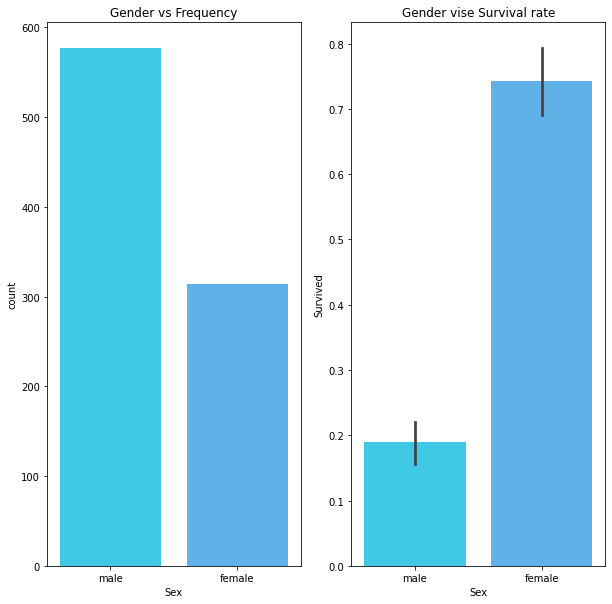

In [54]:
fx, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].set_title("Gender vs Frequency")
axes[1].set_title("Gender vise Survival rate")
fig1_gen = sns.countplot(data=train_df, x='Sex', ax=axes[0])
fig2_gen = sns.barplot(data=train_df, x='Sex', y='Survived', ax=axes[1])

In [55]:
print(train_df[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


In [56]:
train_df.Age.isnull().sum()
train_age_n = train_df.Age.dropna(axis=0)

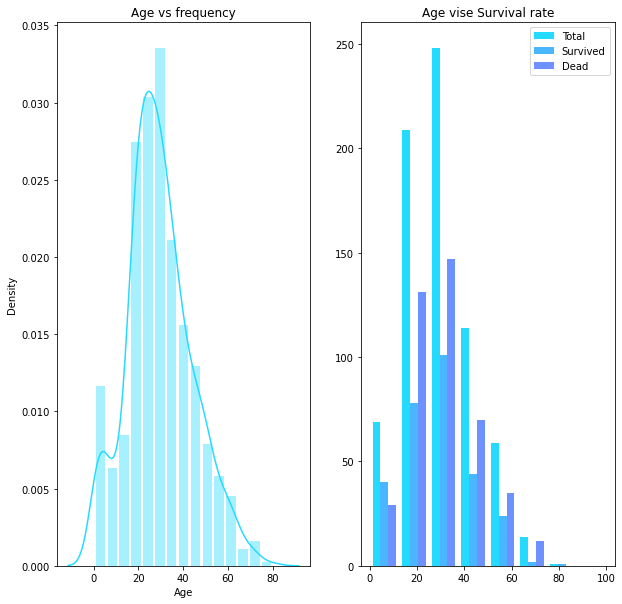

In [57]:
fx, axes = plt.subplots(1, 2, figsize=(10,10))
axes[0].set_title("Age vs frequency")
axes[1].set_title("Age vise Survival rate")
fig1_age = sns.distplot(a=train_age_n, bins=15, ax=axes[0], hist_kws={'rwidth':0.8})

pass_survived_age = train_df[train_df.Survived == 1].Age
pass_dead_age = train_df[train_df.Survived == 0].Age

axes[1].hist([train_df.Age, pass_survived_age, pass_dead_age], bins=8, range=(0, 100), label=['Total', 'Survived', 'Dead'])
axes[1].legend()
plt.show()

In [58]:
full_data = pd.concat([train_df, test_df])

In [59]:
train_age_mean = full_data.Age.mean()
train_age_std = full_data.Age.std()
train_age_null = train_df.Age.isnull().sum()
rand_tr_age = np.random.randint(train_age_mean - train_age_std, train_age_mean + train_age_std, size=train_age_null)
train_df['Age'][np.isnan(train_df['Age'])] = rand_tr_age
train_df['Age'] = train_df['Age'].astype(int) + 1

test_age_mean = full_data.Age.mean()
test_age_std = full_data.Age.std()
test_age_null = test_df.Age.isnull().sum()
rand_ts_age = np.random.randint(test_age_mean - test_age_std, test_age_mean + test_age_std, size=test_age_null)
test_df['Age'][np.isnan(test_df['Age'])] = rand_ts_age
test_df['Age'] = test_df['Age'].astype(int)

train_df.Age = (train_df.Age/15).astype(np.int64)
test_df.Age = (test_df.Age/15).astype(np.int64) + 1

In [60]:
print(train_df[['Age', 'Survived']].groupby(['Age'], as_index = False).mean())

   Age  Survived
0    0  0.591549
1    1  0.348285
2    2  0.384858
3    3  0.406250
4    4  0.230769
5    5  0.500000


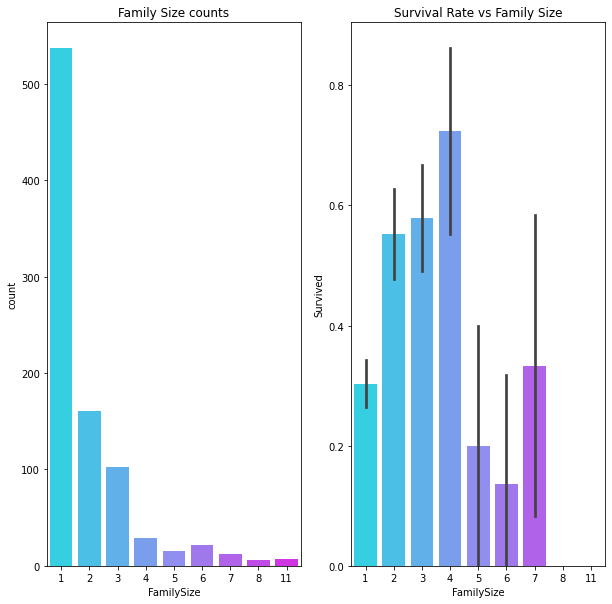

In [61]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1
fx, axes = plt.subplots(1, 2, figsize=(10,10))
axes[0].set_title('Family Size counts')
axes[1].set_title('Survival Rate vs Family Size')
fig1_family = sns.countplot(x=train_df.FamilySize, ax=axes[0], palette='cool')
fig2_family = sns.barplot(x=train_df.FamilySize, y=train_df.Survived, ax=axes[1], palette='cool')

In [62]:
print(train_df[['FamilySize', 'Survived']].groupby(train_df['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0         1.0  0.303538
1         2.0  0.552795
2         3.0  0.578431
3         4.0  0.724138
4         5.0  0.200000
5         6.0  0.136364
6         7.0  0.333333
7         8.0  0.000000
8        11.0  0.000000


In [63]:
train_df['isAlone'] = train_df['FamilySize'].map(lambda x: 1 if x == 1 else 0)
test_df['isAlone'] = test_df['FamilySize'].map(lambda x: 1 if x == 1 else 0)

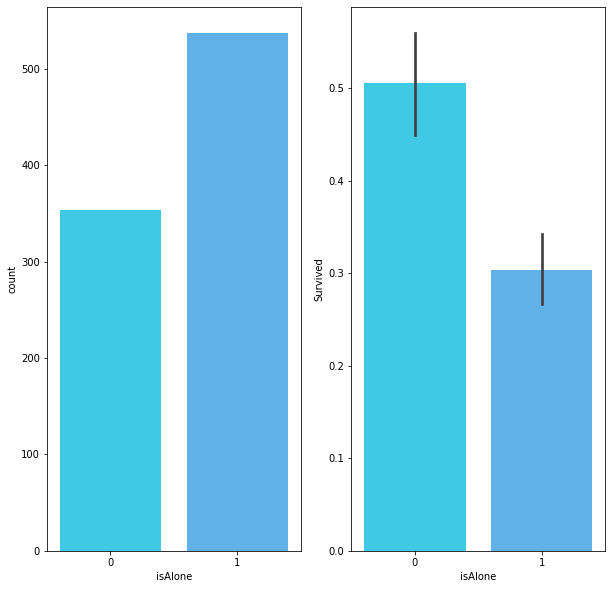

In [64]:
fx, axes = plt.subplots(1, 2, figsize=(10, 10))
fig1_alone = sns.countplot(data=train_df, x='isAlone', ax=axes[0])
fig2_alone = sns.barplot(data=train_df, x='isAlone', y='Survived', ax=axes[1])

In [65]:
train_df.drop(labels=['SibSp', 'Parch'], axis=1, inplace=True)
test_df.drop(labels=['SibSp', 'Parch'], axis=1, inplace=True)
train_df.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Name_Len,FamilySize,isAlone
0,0,3,male,1,A/5 21171,7.2500,NaN,S,Mr.,3,2,0
1,1,1,female,2,PC 17599,71.2833,C85,C,Mrs.,6,2,0
2,1,3,female,1,STON/O2. 3101282,7.9250,NaN,S,Miss.,3,1,1
3,1,1,female,2,113803,53.1000,C123,S,Mrs.,5,2,0
4,0,3,male,2,373450,8.0500,NaN,S,Mr.,3,1,1


In [66]:
train_df['Ticket_Len'] = train_df['Ticket'].apply(lambda x: len(x))
test_df['Ticket_Len'] = test_df['Ticket'].apply(lambda x: len(x))

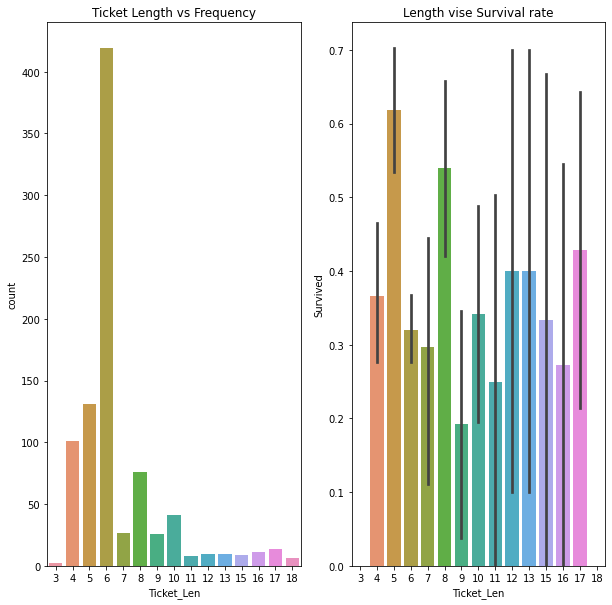

In [67]:
fx, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].set_title("Ticket Length vs Frequency")
axes[1].set_title("Length vise Survival rate")
fig1_tlen = sns.countplot(data=train_df, x='Ticket_Len', ax=axes[0])
fig2_tlen = sns.barplot(data=train_df, x='Ticket_Len',y='Survived', ax=axes[1])

In [68]:
print(train_df[['Ticket_Len', 'Survived']].groupby(train_df['Ticket_Len'], as_index=False).mean())

    Ticket_Len  Survived
0          3.0  0.000000
1          4.0  0.366337
2          5.0  0.618321
3          6.0  0.319809
4          7.0  0.296296
5          8.0  0.539474
6          9.0  0.192308
7         10.0  0.341463
8         11.0  0.250000
9         12.0  0.400000
10        13.0  0.400000
11        15.0  0.333333
12        16.0  0.272727
13        17.0  0.428571
14        18.0  0.000000


In [69]:
train_df.drop(labels='Ticket', axis=1, inplace=True)
test_df.drop(labels='Ticket', axis=1, inplace=True)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Name_Len,FamilySize,isAlone,Ticket_Len
0,0,3,male,1,7.2500,NaN,S,Mr.,3,2,0,9
1,1,1,female,2,71.2833,C85,C,Mrs.,6,2,0,8
2,1,3,female,1,7.9250,NaN,S,Miss.,3,1,1,16
3,1,1,female,2,53.1000,C123,S,Mrs.,5,2,0,6
4,0,3,male,2,8.0500,NaN,S,Mr.,3,1,1,6


In [70]:
test_df.Fare.describe()
test_df['Fare'][np.isnan(test_df['Fare'])] = test_df.Fare.mean()

In [71]:
cabin_null = float(test_df.Cabin.isnull().sum())
print(cabin_null/len(test_df) *100)

77.10437710437711


In [72]:
cabin_null = float(train_df.Cabin.isnull().sum())
print(cabin_null/len(train_df) *100)

77.10437710437711


In [73]:
train_df['hasCabin'] = train_df.Cabin.notnull().astype(int)
test_df['hasCabin'] = test_df.Cabin.notnull().astype(int)

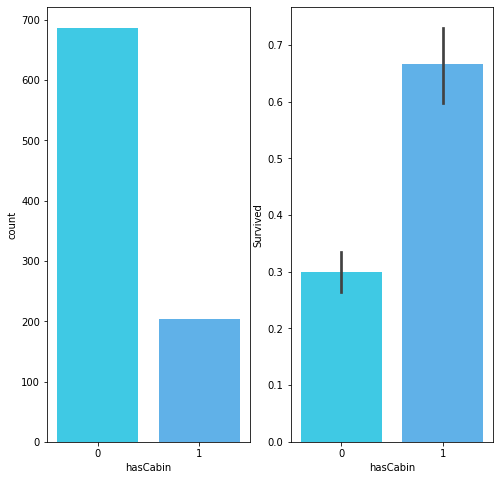

In [74]:
fx, axes = plt.subplots(1, 2, figsize=(8, 8))
fig1_hascabin = sns.countplot(data=train_df, x='hasCabin', ax=axes[0])
fig2_hascabin = sns.barplot(data=train_df, x='hasCabin', y='Survived', ax=axes[1])

In [75]:
train_df.drop(labels='Cabin', axis=1, inplace=True)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Name_Len,FamilySize,isAlone,Ticket_Len,hasCabin
0,0,3,male,1,7.2500,S,Mr.,3,2,0,9,0
1,1,1,female,2,71.2833,C,Mrs.,6,2,0,8,1
2,1,3,female,1,7.9250,S,Miss.,3,1,1,16,0
3,1,1,female,2,53.1000,S,Mrs.,5,2,0,6,1
4,0,3,male,2,8.0500,S,Mr.,3,1,1,6,0


In [76]:
test_df.drop(labels='Cabin', axis=1, inplace=True)
test_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Name_Len,FamilySize,isAlone,Ticket_Len,hasCabin
0,0,3,male,2,7.2500,S,Mr.,3,2,0,9,0
1,1,1,female,3,71.2833,C,Mrs.,6,2,0,8,1
2,1,3,female,2,7.9250,S,Miss.,3,1,1,16,0
3,1,1,female,3,53.1000,S,Mrs.,5,2,0,6,1
4,0,3,male,3,8.0500,S,Mr.,3,1,1,6,0


In [77]:
train_df.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [78]:
train_df['Embarked'] = train_df['Embarked'].fillna('S')

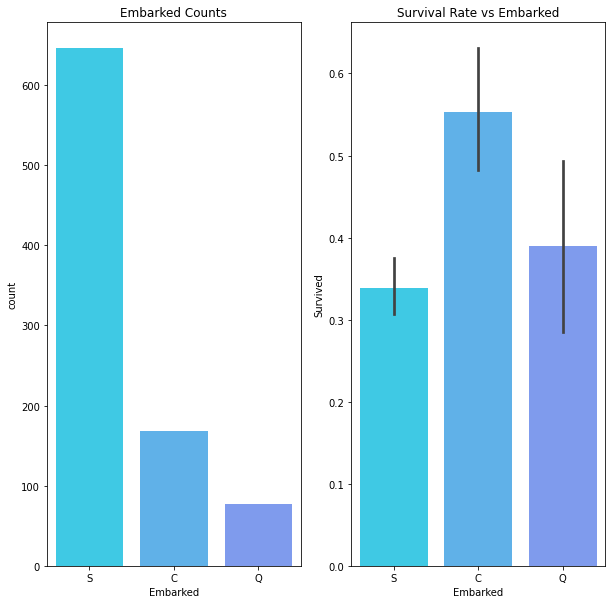

In [79]:
fx, axes = plt.subplots(1, 2, figsize=(10,10))
axes[0].set_title('Embarked Counts')
axes[1].set_title('Survival Rate vs Embarked')
fig1_embarked = sns.countplot(x=train_df.Embarked, ax=axes[0])
fig2_embarked = sns.barplot(x=train_df.Embarked, y=train_df.Survived, ax=axes[1])

In [80]:
print(train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean())

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


In [81]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Name_Len,FamilySize,isAlone,Ticket_Len,hasCabin
0,0,3,male,1,7.2500,S,Mr.,3,2,0,9,0
1,1,1,female,2,71.2833,C,Mrs.,6,2,0,8,1
2,1,3,female,1,7.9250,S,Miss.,3,1,1,16,0
3,1,1,female,2,53.1000,S,Mrs.,5,2,0,6,1
4,0,3,male,2,8.0500,S,Mr.,3,1,1,6,0


In [86]:
X = train_df.iloc[:, 1:12].values
y = train_df.iloc[:, 0].values

In [87]:
label_encoder_sex_tr = LabelEncoder()
label_encoder_title_tr = LabelEncoder()
label_encoder_embarked_tr = LabelEncoder()
X[:, 1] = label_encoder_sex_tr.fit_transform(X[:, 1])
X[:, 5] = label_encoder_title_tr.fit_transform(X[:, 5])
X[:, 4] = label_encoder_embarked_tr.fit_transform(X[:, 4])

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17)

In [89]:
scaler_x = MinMaxScaler((-1,1))
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

In [90]:
accuracies = []

### **Logistic Regression**

In [91]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
lr_score = classifier.score(X_test, y_test)
accuracies.append(lr_score)
print(lr_score)

0.8026315789473685


### **SVM**

In [93]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [94]:
svm_score = svm.score(X_test, y_test)
accuracies.append(svm_score)
print(svm_score)

0.7894736842105263


### **Random Forest**

In [95]:
rdmf = RandomForestClassifier(n_estimators=20, criterion='entropy')
rdmf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [96]:
rdmf_score = rdmf.score(X_test, y_test)
rdmf_score_tr = rdmf.score(X_train, y_train)
accuracies.append(rdmf_score)
print(rdmf_score)
print(rdmf_score_tr)

0.8486842105263158
0.9742895805142084


## **XGBoost**

In [97]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [98]:
xgb_score = xgb.score(X_test, y_test)
accuracies.append(xgb_score)
print(xgb_score)

0.8486842105263158


In [99]:
myLabels = ['Logistic Regression', 'SVM','Random Forest', 'Xgboost']

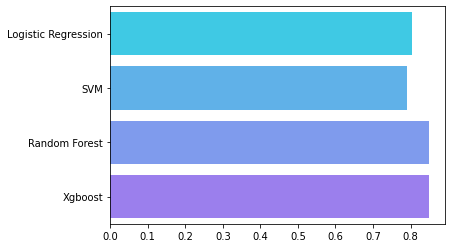

In [100]:
fig1_accu= sns.barplot(x=accuracies, y=myLabels)

### **Conclusion:**

 So, from above we can see that XG Boost Algorithm gives the best accuracy.